<a href="https://colab.research.google.com/github/Afraim/Predection-of-Inflation-rate-using-Machine-Learning-Models/blob/main/Predection_of_Inflation_rate_using_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Uploading dataset </h1>


In [1]:
from google.colab import files
uploaded = files.upload()

Saving ADO April 2023 - Inflation.csv to ADO April 2023 - Inflation (2).csv


In [2]:
file_name=list(uploaded.keys())[0]

In [3]:
import pandas as pd
data = pd.read_csv(file_name, sep=",", encoding="latin-1")

In [4]:
# #from google colab
# import pandas as pd
# data = pd.read_csv("ADO April 2023 - Inflation.csv", sep=",", encoding="latin-1")

<h1> Exploratory Data Analysis </h1>

In [5]:
data.head()

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN


In [6]:
data.dtypes.value_counts()

object     5
float64    1
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionalMember       371 non-null    object 
 1   Year                 371 non-null    object 
 2   Inflation            365 non-null    float64
 3   Unit of Measurement  371 non-null    object 
 4    Subregion           357 non-null    object 
 5    Country Code        322 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.5+ KB


In [8]:
data['RegionalMember'].unique()

array(['Developing Asia', 'Developing Asia excluding the PRC',
       'Caucasus and Central Asia', 'Armenia', 'Azerbaijan', 'Georgia',
       'Kazakhstan', 'Kyrgyz Republic', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'East Asia', 'Hong Kong, China', 'Mongolia',
       "People's Republic of China", 'Republic of Korea', 'Taipei,China',
       'South Asia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
       'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka', 'Southeast Asia',
       'Brunei Darussalam', 'Cambodia', 'Indonesia',
       'Lao People\x92s Dem. Rep.', 'Malaysia', 'Myanmar', 'Philippines',
       'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam', 'The Pacific',
       'Cook Islands', 'Federated States of Micronesia', 'Fiji',
       'Kiribati', 'Marshall Islands', 'Nauru', 'Niue', 'Palau',
       'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu'], dtype=object)

In [9]:
data['RegionalMember'].value_counts()

Developing Asia                      7
Brunei Darussalam                    7
Indonesia                            7
Lao Peoples Dem. Rep.               7
Malaysia                             7
Myanmar                              7
Philippines                          7
Singapore                            7
Thailand                             7
Timor-Leste                          7
Viet Nam                             7
The Pacific                          7
Cook Islands                         7
Federated States of Micronesia       7
Fiji                                 7
Kiribati                             7
Marshall Islands                     7
Nauru                                7
Niue                                 7
Palau                                7
Papua New Guinea                     7
Samoa                                7
Solomon Islands                      7
Tonga                                7
Tuvalu                               7
Cambodia                 

In [10]:
#checking for null values in dataset

data_null=data.isnull().sum()
print(data_null)

#checking for percentage in the dataset

data_percentage=(data_null/len(data))*100
print(data_percentage)

RegionalMember          0
Year                    0
Inflation               6
Unit of Measurement     0
 Subregion             14
 Country Code          49
dtype: int64
RegionalMember          0.000000
Year                    0.000000
Inflation               1.617251
Unit of Measurement     0.000000
 Subregion              3.773585
 Country Code          13.207547
dtype: float64


In [11]:
data_duplicate=data[data.duplicated()]
print(data_duplicate)

Empty DataFrame
Columns: [RegionalMember, Year, Inflation, Unit of Measurement,  Subregion,  Country Code]
Index: []


In [12]:
rows , columns =data.shape
print("rows",rows)
print("columns",columns)

rows 371
columns 6


In [13]:

column_name='Inflation'
column=data[column_name]
mean=column.mean()
print(mean)

median=column.median()
print(median)

mode=column.mode()
print(mode)

4.728767123287671
3.7
0    2.0
Name: Inflation, dtype: float64


Text(0.5, 1.0, 'inflation based on year')

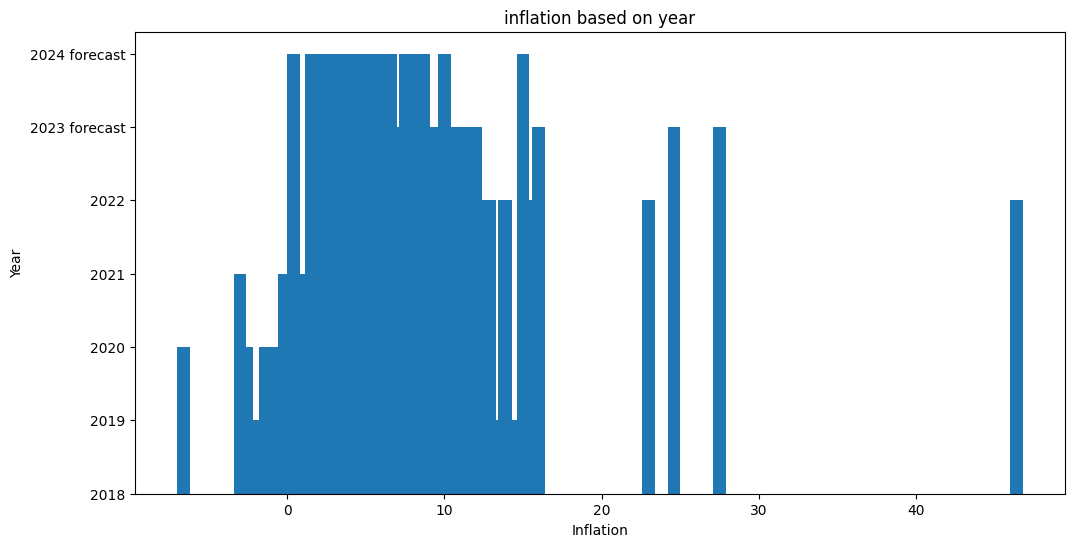

In [14]:
import matplotlib.pyplot as plt
x_column='Inflation'
y_column='Year'
plt.figure(figsize=(12, 6))
plt.bar(data[x_column],data[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('inflation based on year')

<Axes: xlabel='Inflation', ylabel='Year'>

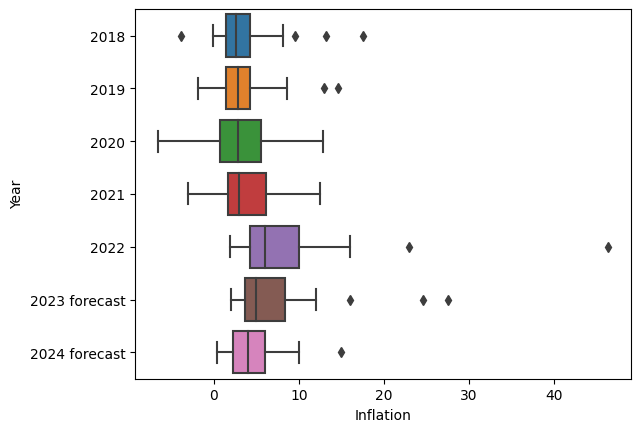

In [15]:
import seaborn as sns
sns.boxplot(data=data,x=x_column, y=y_column)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionalMember       371 non-null    object 
 1   Year                 371 non-null    object 
 2   Inflation            365 non-null    float64
 3   Unit of Measurement  371 non-null    object 
 4    Subregion           357 non-null    object 
 5    Country Code        322 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.5+ KB


count    365.000000
mean       4.728767
std        4.555189
min       -6.600000
25%        2.200000
50%        3.700000
75%        6.200000
max       46.400000
Name: Inflation, dtype: float64


<ipython-input-17-c66b68bc6bd9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inflation'], color='g',bins=100,hist_kws={'alpha': 0.4});


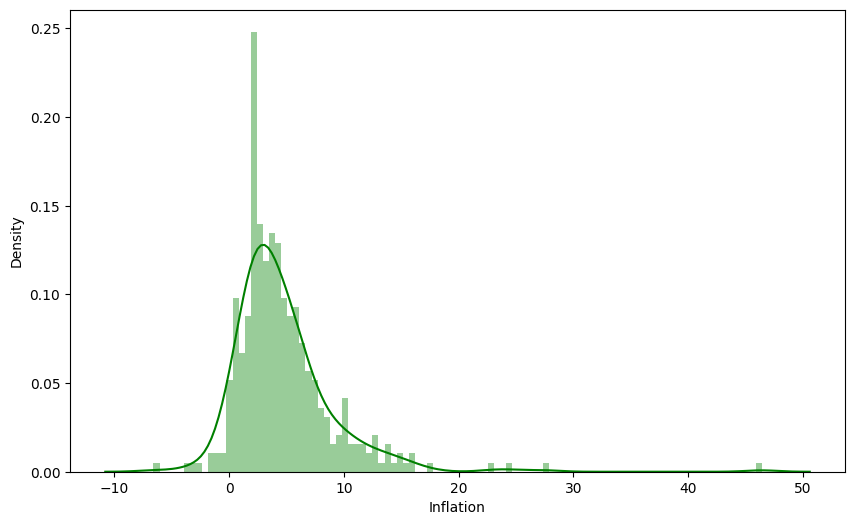

In [17]:
print(data['Inflation'].describe())
plt.figure(figsize=(10,6))
sns.distplot(data['Inflation'], color='g',bins=100,hist_kws={'alpha': 0.4});

In [18]:
import plotly.express as px
central_asian_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Kazakhstan', 'Kyrgyz Republic',
    'Tajikistan', 'Turkmenistan', 'Uzbekistan']
central_asian_data=data[data['RegionalMember'].isin(central_asian_countries)]

fig=px.line(central_asian_data,x='Year', y='Inflation' ,color='RegionalMember', title='inflation rate of central asian countries')

fig.show()

In [19]:
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asian_data=data[data['RegionalMember'].isin(south_asian_countries)]
fig=px.line(south_asian_data,x='Year',y='Inflation',color='RegionalMember',title='inflation rate of south asian countries')
fig.show()

In [20]:
column_name=['Inflation']
column=data[column_name]
mean=column.mean()
print(mean)

#box plot of inflation rate by sub region

fig = px.box(data, x=' Subregion', y='Inflation', title='Inflation Rates by Subregion')
fig.show()

Inflation    4.728767
dtype: float64


In [21]:
mean_inflation_by_subregion = data.groupby(' Subregion')['Inflation'].mean().reset_index()

mean_inflation_by_year = data.groupby('Year')['Inflation'].mean().reset_index()

fig = px.line(mean_inflation_by_year, x='Year', y='Inflation',
              title='Mean Inflation Rates by Year')
fig.show()

In [22]:
pd.pivot_table(data, index=['RegionalMember'], columns=['Inflation'], values=['Year'])

<ipython-input-22-c274342662db>:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



RegionalMember
Afghanistan
Armenia
Azerbaijan
Bangladesh
Bhutan
Brunei Darussalam
Cambodia
Caucasus and Central Asia
Cook Islands
Developing Asia


In [23]:
data.isnull().sum()

RegionalMember          0
Year                    0
Inflation               6
Unit of Measurement     0
 Subregion             14
 Country Code          49
dtype: int64

<Axes: >

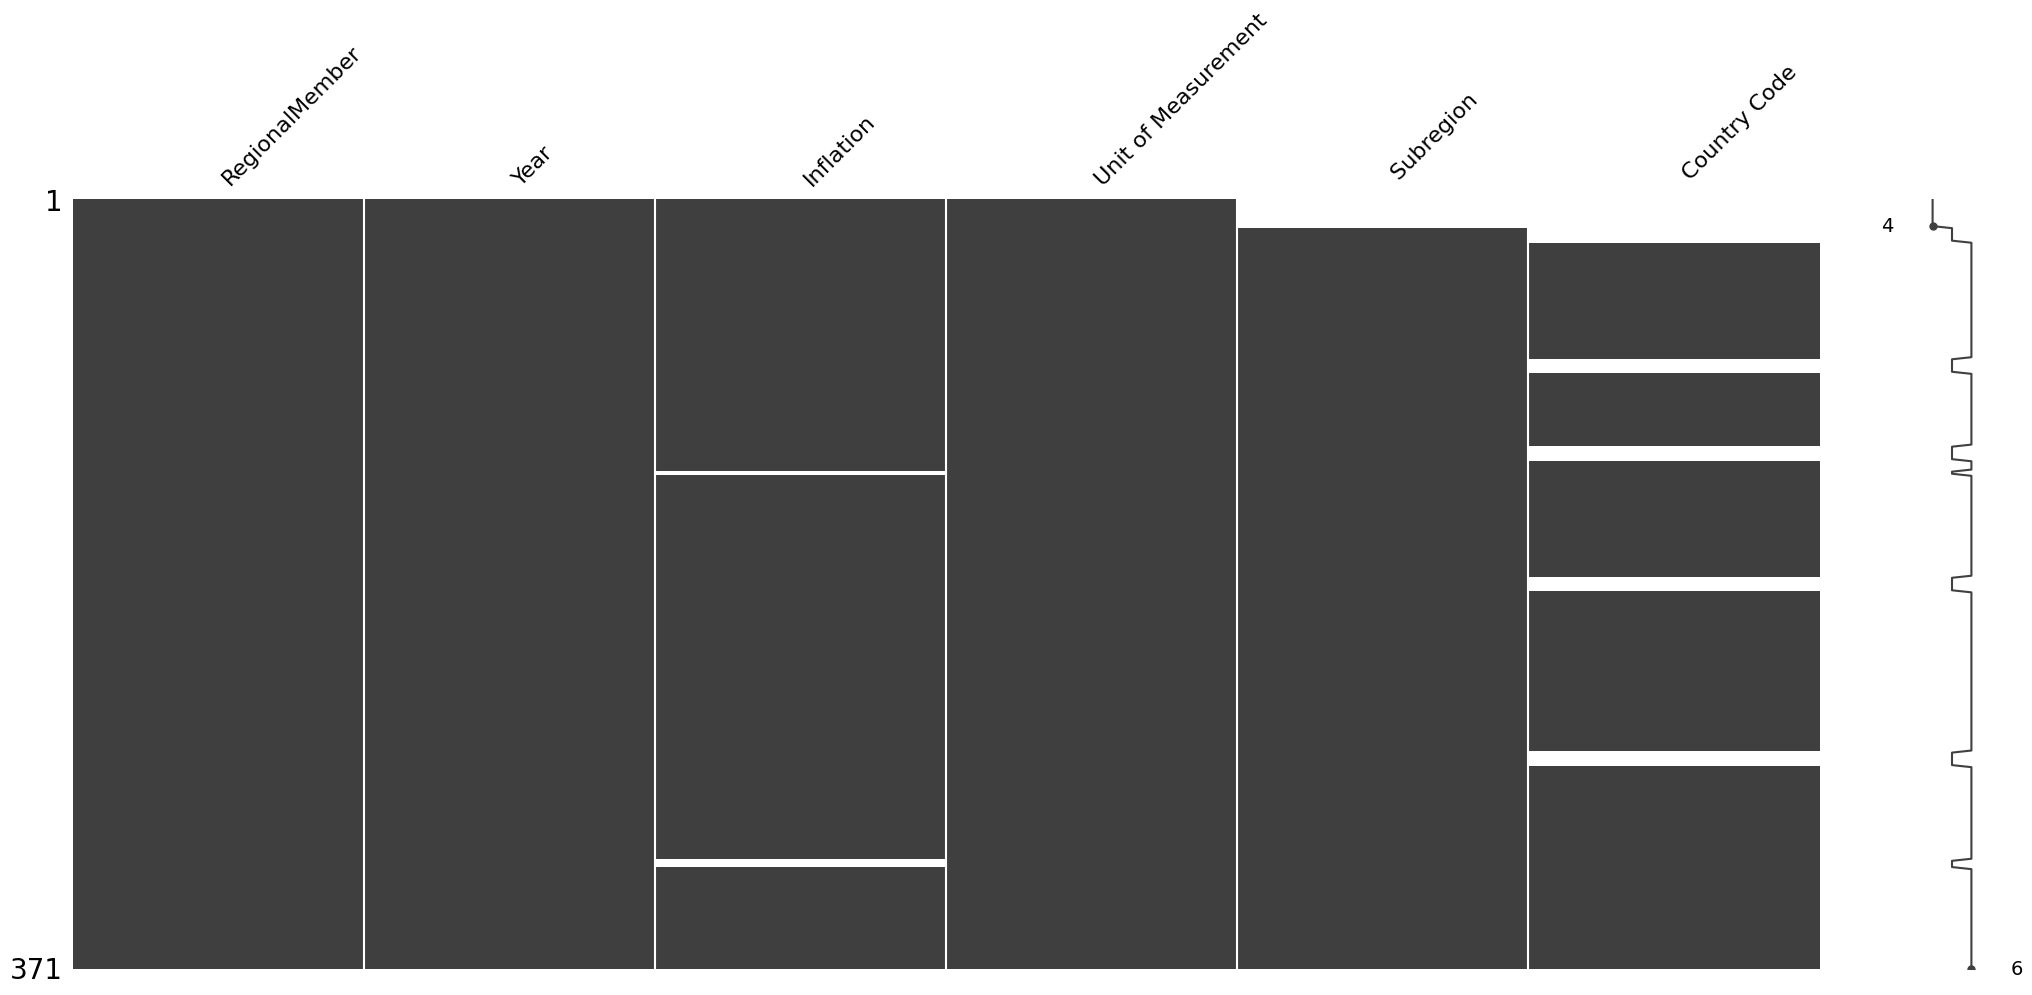

In [24]:
import missingno as msno
msno.matrix(data)

<h4>Analysis of identifying inflation patterns based on subregions in Asia</h4>

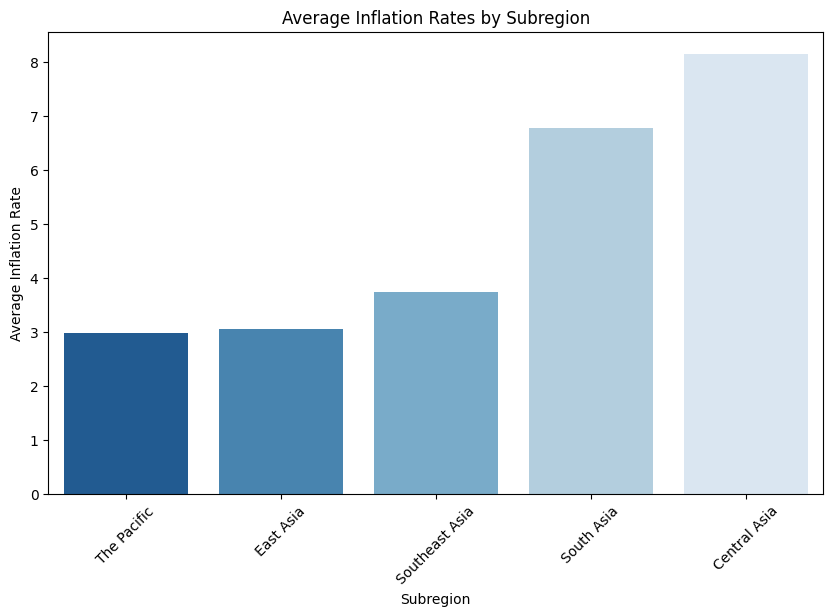

In [25]:
average_inflation_by_subregion = data.groupby(' Subregion')['Inflation'].mean().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_inflation_by_subregion.index, y=average_inflation_by_subregion.values, palette='Blues_r')
ax.set_title('Average Inflation Rates by Subregion')
ax.set_xlabel('Subregion')
ax.set_ylabel('Average Inflation Rate')
ax.tick_params(axis='x', rotation=45)
plt.show()

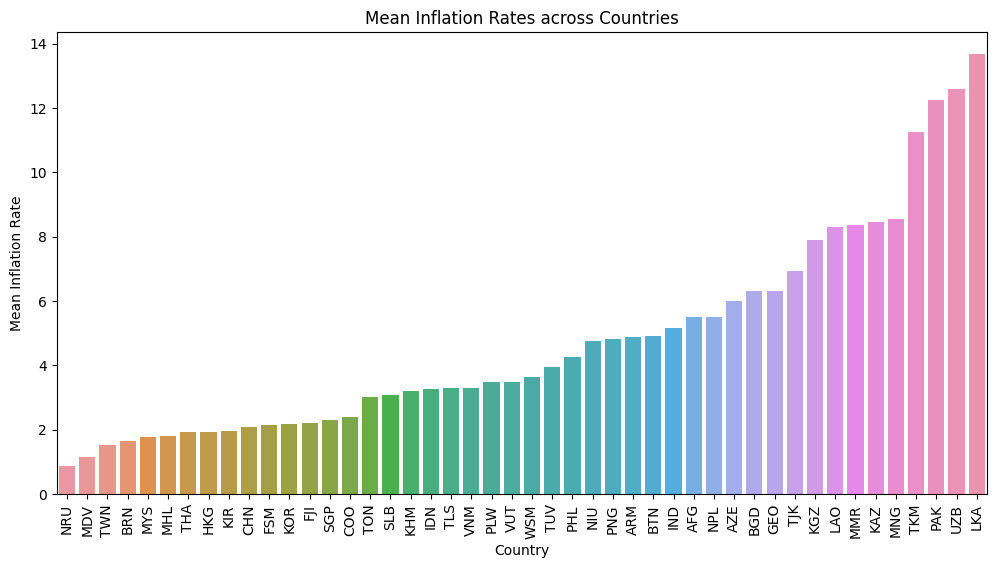

In [26]:
grouped_data = data.groupby(' Country Code')['Inflation'].mean()


sorted_data = grouped_data.sort_values()


plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.xlabel('Country')
plt.ylabel('Mean Inflation Rate')
plt.title('Mean Inflation Rates across Countries')
plt.xticks(rotation=90)
plt.show()

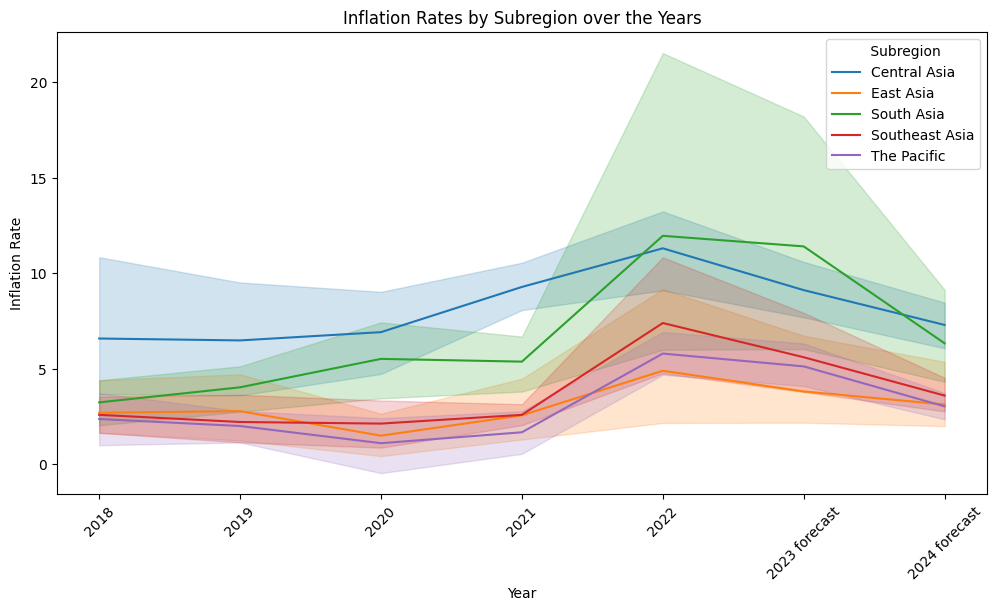

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Inflation', hue=' Subregion')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rates by Subregion over the Years')
plt.xticks(rotation=45)
plt.show()

<h2> Data Cleaning </h2>


In [28]:
dset=data

In [29]:
#Drop columns Unit of Measurement
dset = dset.drop(columns=['Unit of Measurement'])

In [30]:
print(dset.columns.tolist())

['RegionalMember', 'Year', 'Inflation', ' Subregion', ' Country Code']


In [31]:
dset.rename(columns={' Country Code': 'CountryCode', ' Subregion': 'Subregion'}, inplace=True)

In [32]:
#total Empty in dataset
dset.isna().sum().sum()

69

In [33]:
#View Missing values in all columns
cc = dset['CountryCode'].isna().sum()
sr = dset['Subregion'].isna().sum()
rm = dset['RegionalMember'].isna().sum()
ifn = dset['Inflation'].isna().sum()
print("Countrycode",cc)
print("Subregion",sr)
print("Regional Membr",rm)
print("Inflation",ifn)

Countrycode 49
Subregion 14
Regional Membr 0
Inflation 6


In [34]:
#Replacing missing values of Inflation column
dset["Inflation"] = dset["Inflation"].fillna("not available")

In [35]:
# Deleting other values which is NaN

dset = dset.dropna(axis=0)

In [36]:
dset.isnull().sum()

RegionalMember    0
Year              0
Inflation         0
Subregion         0
CountryCode       0
dtype: int64

In [37]:
# Replace "not available" values which is changed before to NaN again. Here, We are predicting Inflation
import numpy as np
#Again now replace not availble with nan
dset['Inflation']= dset['Inflation'].replace('not available', np.nan)

In [38]:
#Sort values according to nan of inflation
dset = dset.sort_values(by="Inflation", ascending=False, na_position='first')

<h3> One hot encoding to dset</h3>

In [39]:
dset_one_hot_encoding = pd.get_dummies(dset)
print("Dataset dimension",dset_one_hot_encoding.shape)

Dataset dimension (322, 105)


In [40]:
print(dset_one_hot_encoding)

     Inflation  RegionalMember_Afghanistan  RegionalMember_Armenia  \
131        NaN                           1                       0   
132        NaN                           1                       0   
318        NaN                           0                       0   
319        NaN                           0                       0   
320        NaN                           0                       0   
..         ...                         ...                     ...   
295       -1.8                           0                       0   
289       -2.6                           0                       0   
339       -3.0                           0                       0   
350       -3.9                           0                       0   
310       -6.6                           0                       0   

     RegionalMember_Azerbaijan  RegionalMember_Bangladesh  \
131                          0                          0   
132                          0       

In [41]:
#verify no null value in whole dataset
dset.isnull().sum()

RegionalMember    0
Year              0
Inflation         6
Subregion         0
CountryCode       0
dtype: int64

Dividing data into two groups having missing values of Inflation and without missing values

In [42]:
column_with_nan = "Inflation"
data_with_nan = dset_one_hot_encoding[dset_one_hot_encoding[column_with_nan].isnull()]
data_without_nan = dset_one_hot_encoding[dset_one_hot_encoding[column_with_nan].notnull()]
print("Dset without nan dimension",data_without_nan.shape)
print("Dset with nan dimension",data_with_nan.shape)

Dset without nan dimension (316, 105)
Dset with nan dimension (6, 105)


In [43]:
#Create train from non_missing values
X_train = data_without_nan.drop('Inflation',axis=1)
y_train = data_without_nan["Inflation"]

In [44]:
xx_train = X_train.iloc[1:6]
yy_train = y_train.iloc[1:6]

In [45]:
X_train = X_train.values
y_train = y_train.values
xx_train = xx_train.values
yy_train = yy_train.values

<H1> RUNNING MODELS </H1>


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

<h2> Running Random Forest, SVM and ANN </h2>

In [47]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_without_nan.drop('Inflation', axis=1), data_without_nan['Inflation'], test_size=0.2, random_state=42)

# Training Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Training SVM Regression
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Training Artificial Neural Network (ANN) Regression
ann_model = Sequential()
ann_model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
ann_predictions = ann_model.predict(X_test).flatten()

# Evaluation metrics
models = [rf_predictions, svm_predictions, ann_predictions]
model_names = ['Random Forest', 'SVM', 'ANN']
metrics = {
    'Mean Squared Error': mean_squared_error,
    'R-squared': r2_score,
}

results = []

for model, model_name in zip(models, model_names):
    model_result = {'Model': model_name}
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, model)
        model_result[metric_name] = metric_value
    results.append(model_result)

# Creating comparison table
results_df = pd.DataFrame(results)
print(results_df)

2/2 [==============================] - 0s 7ms/step
           Model  Mean Squared Error  R-squared
0  Random Forest           11.771387   0.388002
1            SVM           12.049951   0.373520
2            ANN           29.901334  -0.554579


<h1> Discussion </h1>
Here's what we can infer from the output:
<ul><li>
Mean Squared Error (MSE): Lower values of MSE indicate better model performance. In this case, the "Random Forest" and "SVM" models have similar MSE values, while the "ANN" model has a higher MSE. The "Random Forest" and "SVM" models seem to have better predictive performance in terms of MSE compared to the "ANN" model.</li><br><br>
<li>
R-squared: R-squared is a measure of how well the model's predictions explain the variance in the data. Positive R-squared values indicate that the model's predictions are better than simply predicting the mean of the target variable. In this case, both the "Random Forest" and "SVM" models have positive R-squared values, while the "ANN" model has a negative R-squared value. This suggests that the "Random Forest" and "SVM" models are better at explaining variance compared to the "ANN" model.</li></ul>

In [48]:
# import ydata library for more analysis
!pip install ydata-profiling
from ydata_profiling import ProfileReport
# profile report generaiton
report = ProfileReport(data)
report.to_file('Predection of Inflation rate using Machine Learning Models.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a271b5e51d00c2c87188ce58c940329e4850b466e5a3b8f8d1428203636d8d1e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]